In [1]:
pip install opencv-python tensorflow numpy matplotlib


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
def generate_dummy_data(num_samples=1000, img_size=100):
    gestures = []
    labels = []
    for _ in range(num_samples):
        # Generate random gesture images (grayscale)
        img = np.random.randint(0, 256, (img_size, img_size), dtype=np.uint8)
        gestures.append(img)
        # Randomly assign labels (5 dummy gestures)
        labels.append(np.random.randint(0, 5))

    gestures = np.array(gestures).reshape(-1, img_size, img_size, 1)
    gestures = gestures / 255.0  # Normalize images
    labels = to_categorical(labels, num_classes=5)  # 5 dummy gesture classes

    return gestures, labels

gestures, labels = generate_dummy_data()


In [4]:
X_train, X_val, y_train, y_val = train_test_split(gestures, labels, test_size=0.2, random_state=42)


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes for dummy gestures
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
25/25 [==============================] - 14s 499ms/step - loss: 1.7860 - accuracy: 0.2062 - val_loss: 1.6096 - val_accuracy: 0.1750
Epoch 2/10
25/25 [==============================] - 12s 477ms/step - loss: 1.6092 - accuracy: 0.2300 - val_loss: 1.6097 - val_accuracy: 0.1900
Epoch 3/10
25/25 [==============================] - 12s 467ms/step - loss: 1.6087 - accuracy: 0.2288 - val_loss: 1.6099 - val_accuracy: 0.1900
Epoch 4/10
25/25 [==============================] - 12s 465ms/step - loss: 1.6086 - accuracy: 0.2288 - val_loss: 1.6102 - val_accuracy: 0.1900
Epoch 5/10
25/25 [==============================] - 12s 489ms/step - loss: 1.6084 - accuracy: 0.2288 - val_loss: 1.6103 - val_accuracy: 0.1900
Epoch 6/10
25/25 [==============================] - 12s 494ms/step - loss: 1.6083 - accuracy: 0.2288 - val_loss: 1.6103 - val_accuracy: 0.1900
Epoch 7/10
25/25 [==============================] - 19s 764ms/step - loss: 1.6078 - accuracy: 0.2288 - val_loss: 1.6106 - val_accuracy: 0.1900

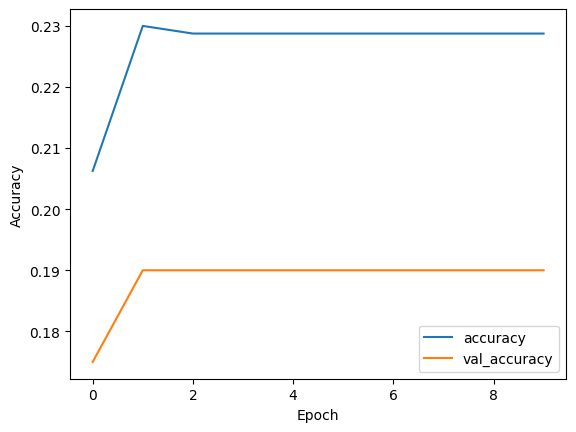

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
def predict_gesture(frame):
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    gesture_id = np.argmax(prediction)
    return gesture_id

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gesture_id = predict_gesture(frame)
    gesture_name = {0: 'Gesture 1', 1: 'Gesture 2', 2: 'Gesture 3', 3: 'Gesture 4', 4: 'Gesture 5'}[gesture_id]
    cv2.putText(frame, gesture_name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Hand Gesture Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
